#### Algoritmos ingenios

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import lec3_graphs as afx

In [2]:
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn')

In [6]:
df = pd.read_csv('ucbadmissions.csv').drop(columns='Unnamed: 0')
df.head()

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353


In [9]:
df.sample()

,Admit,Gender,Dept,Freq
21,Rejected,Male,F,351


debido a que existen pocos datatos en el df, es que se generan nuevos datos artificiales para poder realizar el estudio

In [10]:
df_deagg = afx.deaggregate_statistics(df)

In [11]:
df_deagg

,Admit,Gender,Dept
0,Admitted,Male,A
1,Admitted,Male,A
2,Admitted,Male,A
3,Admitted,Male,A
4,Admitted,Male,A
5,Admitted,Male,A
6,Admitted,Male,A
7,Admitted,Male,A
8,Admitted,Male,A
9,Admitted,Male,A


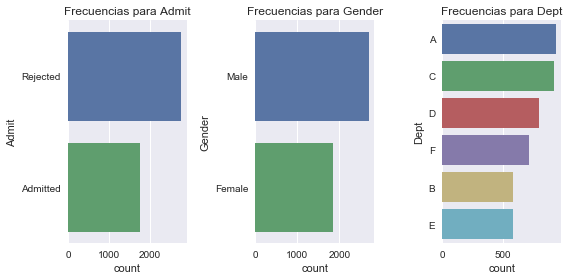

In [18]:
plt.figure(figsize=(8,4))

for n,i in enumerate(df_deagg.columns):
    plt.subplot(1,3,n+1) #1 fila,3 columnas, en paso de 1
    sns.countplot(y=df_deagg[i],order=df_deagg[i].value_counts().index)
    plt.title('Frecuencias para {}'.format(i))
    plt.tight_layout()

In [19]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [20]:
lbl = LabelEncoder()

In [26]:
df_deagg['Gender']= lbl.fit_transform(df_deagg['Gender'])
df_deagg['Admit']= lbl.fit_transform(df_deagg['Admit'])
df_deagg=pd.concat([df_deagg,pd.get_dummies(df_deagg['Dept'],prefix='dept')],axis=1).drop(columns='Dept')

In [27]:
df_deagg

,Admit,Gender,dept_A,dept_B,dept_C,dept_D,dept_E,dept_F
0,0,1,1,0,0,0,0,0
1,0,1,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0
5,0,1,1,0,0,0,0,0
6,0,1,1,0,0,0,0,0
7,0,1,1,0,0,0,0,0
8,0,1,1,0,0,0,0,0
9,0,1,1,0,0,0,0,0


In [28]:
X_train,X_test,y_train,y_test = train_test_split(df_deagg.loc[:,'Gender':'dept_F'],
                                                df_deagg['Admit'],test_size=0.3,random_state=11238)

In [29]:
X_train.shape[0]/df_deagg.shape[0]

0.6999558108705258

In [30]:
nb_classifier = BernoulliNB()

In [31]:
nb_classifier.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [32]:
nb_log_prob_pred = nb_classifier.predict_log_proba(X_test)

In [33]:
nb_prob_pred = nb_classifier.predict_proba(X_test)
nb_prob_pred[:10]

array([[0.62774266, 0.37225734],
       [0.25103458, 0.74896542],
       [0.25103458, 0.74896542],
       [0.25103458, 0.74896542],
       [0.76261302, 0.23738698],
       [0.70686456, 0.29313544],
       [0.70686456, 0.29313544],
       [0.18251049, 0.81748951],
       [0.38969655, 0.61030345],
       [0.18251049, 0.81748951]])

In [34]:
nb_class_pred = nb_classifier.predict(X_test)
nb_class_pred[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [35]:
cnf = confusion_matrix(y_test,nb_class_pred)/len(y_test)
cnf

array([[0.21428571, 0.17820324],
       [0.12739323, 0.48011782]])

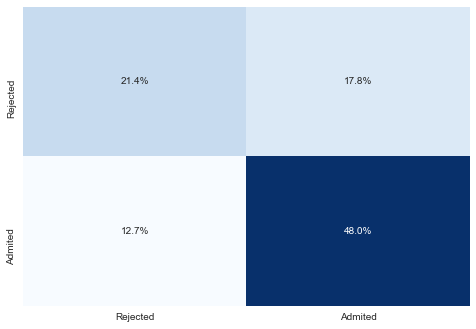

In [42]:
cnf = confusion_matrix(y_test,nb_class_pred)/len(y_test)
target_label = ['Rejected','Admited']
sns.heatmap(cnf,annot=True,fmt='.1%',cbar=False,cmap='Blues',
           xticklabels=target_label,yticklabels=target_label)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_class_pred))

              precision    recall  f1-score   support

           0       0.63      0.55      0.58       533
           1       0.73      0.79      0.76       825

    accuracy                           0.69      1358
   macro avg       0.68      0.67      0.67      1358
weighted avg       0.69      0.69      0.69      1358



In [45]:
pr_1_nb = nb_prob_pred[:,1]

In [46]:
fpr, tpr, _= roc_curve(y_test,pr_1_nb)
auc = roc_auc_score(y_test,pr_1_nb)

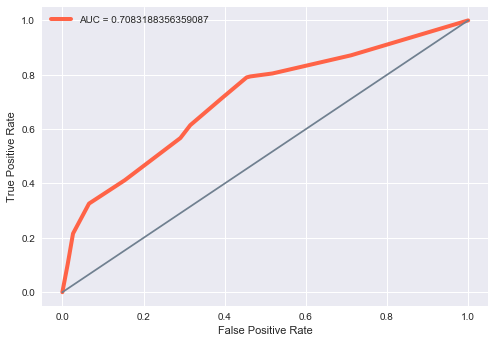

In [47]:
plt.plot(fpr,tpr,label ='AUC = {}'.format(auc),color = 'tomato',lw=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],color='slategrey')
plt.legend()

Se puede observar que se clasifica correctamente el 80% de los verdaderos positivos la clasificar el 45% de falsos positivos

In [48]:
np.exp(nb_classifier.class_log_prior_).round(2)

array([0.39, 0.61])

In [49]:
afx.compare_priors(X_train,X_test,y_train,y_test,[0.39,0.61])

A priori: [0.39, 0.61]
Accuracy: 0.694
Recall: 0.79
Precision: 0.729
F1: 0.759
AUC: 0.708



Esto es lo mismo que se obtiene anteriormente, ahora que pasaria si ambas clases tienen las mismas chances de ocurrir

In [50]:
afx.compare_priors(X_train,X_test,y_train,y_test,[.5,.5])

A priori: [0.5, 0.5]
Accuracy: 0.672
Recall: 0.713
Precision: 0.738
F1: 0.725
AUC: 0.708



In [ ]:
from